# **Libraries Loading, Data Extraction, and cleaning**

## **Load Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from collections import Counter
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [ ]:
! git clone https://github.com/adityajaas/AMEX_2020_Competition

fatal: destination path 'AMEX_2020_Competition' already exists and is not an empty directory.


In [ ]:
train_data = pd.read_csv('/content/AMEX_2020_Competition/Training_Data.csv')
test_data = pd.read_csv('/content/AMEX_2020_Competition/Evaluation_Data.csv')
data_info = pd.read_csv('/content/AMEX_2020_Competition/Data_Dictionary.csv', sep=';', encoding='cp1252')

In [ ]:
train_data.head(10)

,cust_id,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,acq_sub_chn,acq_type_grp,fee_type_grp,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
0,550391.0,0.0,1.0,74.0,1.0,0.0,"1,518",122.0,811,96.0,707,26.0,-,606,36.0,28,2.0,814,98.0,9.0,203.0,(2),Unreferred,external,no_fee,63.0,1.0,0.0,0.0,1.0,"80,000",1.0,1.0,0.0,0.0,0.0,0.000,482,418,1376.0,0.0,-,1.0,0.034044,0.0000,991,-,0.0,-,3.0
1,550392.0,0.0,1.0,64.0,0.0,0.0,"4,807",354.0,"1,052",82.0,"3,756",272.0,673,"3,164",456.0,"2,291",44.0,"1,265",116.0,0.0,0.0,15,In House,others,no_fee,203.0,1.0,0.0,0.0,1.0,"140,000",1.0,1.0,1.0,0.0,0.0,0.000,"2,165","2,165",1300.0,0.0,7,1.0,0.044086,0.0877,2,24,2.0,-,0.0
2,550393.0,0.0,1.0,75.0,1.0,0.0,"2,361",204.0,"1,351",118.0,"1,010",86.0,237,693,152.0,-,0.0,"1,623",166.0,9.0,18.0,(20),NaN,NaN,full_fee,201.0,1.0,0.0,0.0,1.0,"32,800",0.0,0.0,0.0,0.0,0.0,0.000,703,687,1376.0,0.0,-,1.0,0.039613,0.0000,"4,828",-,0.0,387,3.0
3,550394.0,0.0,2.0,73.0,0.0,1.0,"5,452",142.0,"1,195",50.0,"4,257",92.0,803,"1,618",64.0,"2,760",54.0,"1,605",54.0,9.0,23.0,30,NaN,NaN,full_fee,286.0,1.0,0.0,0.0,1.0,"100,000",1.0,0.0,0.0,0.0,0.0,0.000,"1,225","1,225",1372.0,1.0,493,1.0,0.001200,0.0000,"4,598",-,0.0,295,4.0
4,550395.0,0.0,2.0,68.0,0.0,0.0,170,34.0,88,20.0,82,14.0,10,10,4.0,-,0.0,66,18.0,0.0,0.0,(9),Affiliates,spillover,no_fee,123.0,1.0,0.0,0.0,1.0,"20,800",1.0,0.0,0.0,0.0,0.0,0.001,51,35,1338.0,0.0,-,2.0,0.003378,0.0168,"2,176","2,606",5.0,143,13.0
5,550396.0,0.0,2.0,73.0,1.0,1.0,"46,428",644.0,"5,108",116.0,"41,323",528.0,"12,620","28,522",820.0,"8,155",108.0,"34,480",460.0,0.0,0.0,"1,146",NaN,NaN,full_fee,179.0,1.0,0.0,0.0,1.0,"149,600",1.0,0.0,0.0,0.0,0.0,0.000,"11,555","11,555",1255.0,0.0,-,1.0,0.207708,0.0000,-,-,0.0,-,0.0
6,550397.0,0.0,2.0,69.0,1.0,1.0,"12,431",442.0,"5,679",232.0,"6,753",210.0,608,"4,205",248.0,"2,801",56.0,"8,376",330.0,13.0,27.0,(75),Unreferred,spillover,full_fee,280.0,1.0,0.0,0.0,1.0,"58,800",1.0,0.0,0.0,0.0,0.0,0.000,"3,316","3,316",1255.0,1.0,19,1.0,0.064085,0.3565,"2,967",441,2.0,"1,866",2.0
7,550398.0,1.0,2.0,58.0,0.0,0.0,"22,606",472.0,"10,796",182.0,"11,812",290.0,332,"4,155",352.0,"1,673",80.0,"17,909",312.0,15.0,93.0,(48),Affiliates,spillover,full_fee,219.0,1.0,0.0,0.0,1.0,"140,000",0.0,0.0,0.0,0.0,0.0,0.001,"6,503","6,287",1239.0,0.0,-,2.0,0.143371,0.0000,"73,575",-,0.0,"5,833",6.0
8,550399.0,0.0,2.0,71.0,0.0,1.0,"3,127",116.0,"1,090",58.0,"2,037",58.0,25,14,4.0,293,4.0,"1,949",102.0,3.0,3.0,2,NaN,NaN,full_fee,461.0,1.0,0.0,0.0,0.0,-,1.0,0.0,0.0,0.0,0.0,0.000,"1,267","1,267",1281.0,2.0,482,0.0,0.000000,0.0000,-,-,0.0,-,0.0
9,550400.0,0.0,1.0,68.0,0.0,1.0,"2,770",258.0,901,90.0,"1,869",168.0,617,788,184.0,893,26.0,"1,103",160.0,5.0,5.0,185,NaN,NaN,full_fee,280.0,1.0,0.0,0.0,0.0,-,1.0,0.0,0.0,0.0,0.0,0.000,831,823,1376.0,1.0,421,0.0,0.000000,0.0000,9,-,0.0,-,2.0


In [ ]:
print(train_data.shape)

(19599, 50)


## **Preprocessing and Cleaning**

In [ ]:
# Replacing brackets for train data
train_data['pre6m_total_mc_trs'] = (train_data['pre6m_total_mc_trs'].str.replace(r"\(","")).str.replace(r"\)","")

In [ ]:
# Replacing brackets for test data
test_data['pre6m_total_mc_trs'] = (test_data['pre6m_total_mc_trs'].str.replace(r"\(","")).str.replace(r"\)","")

In [ ]:
# Dropping the unnecessary cols from train
train_data = train_data.drop(columns=['acq_sub_chn','acq_type_grp','fee_type_grp'])

In [ ]:
# Dropping the channel of acquition of the first card by customer for test data
test_data = test_data.drop(columns=['acq_sub_chn','acq_type_grp','fee_type_grp'])

In [ ]:
# processing numeric columns for train data
cols = ['pre6m_cust_spend','pre6m_cust_non_disc_amt','pre6m_cust_disc_amt','pre6m_cust_outbound_amt','pre6m_cust_online_amt',
        'pre6m_cust_travel_amt','pre6m_cust_retail_amt','pre6m_total_mc_trs','sum_total_line_amt','cust_max_credit_12m_amt','cust_max_remit_12m_amt',
        'cnsumr_chrg_avg_credit_12m_amt','sow_tot_annual_ext_pmt_amt','sow_tot_revol_bal_amt','sow_tot_trans_bal_amt']

for col in cols:
  train_data[col] = train_data[col].str.replace(r",","") 

In [ ]:
# processing numeric columns for test data
cols = ['pre6m_cust_spend','pre6m_cust_non_disc_amt','pre6m_cust_disc_amt','pre6m_cust_outbound_amt','pre6m_cust_online_amt',
        'pre6m_cust_travel_amt','pre6m_cust_retail_amt','pre6m_total_mc_trs','sum_total_line_amt','cust_max_credit_12m_amt','cust_max_remit_12m_amt',
        'cnsumr_chrg_avg_credit_12m_amt','sow_tot_annual_ext_pmt_amt','sow_tot_revol_bal_amt','sow_tot_trans_bal_amt']

for col in cols:
  test_data[col] = test_data[col].str.replace(r",","")

In [ ]:
# Converting dataframe to numeric cols for train data
for col in train_data.columns:
  train_data[col] = pd.to_numeric(train_data[col], errors='coerce')

In [ ]:
# Converting dataframe to numeric cols for test data
for col in test_data.columns:
  test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

In [ ]:
train_data.head(10)

,cust_id,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
0,550391.0,0.0,1.0,74.0,1.0,0.0,1518.0,122.0,811.0,96.0,707.0,26.0,NaN,606.0,36.0,28.0,2.0,814.0,98.0,9.0,203.0,2.0,63.0,1.0,0.0,0.0,1.0,80000.0,1.0,1.0,0.0,0.0,0.0,0.000,482.0,418.0,1376.0,0.0,NaN,1.0,0.034044,0.0000,991.0,NaN,0.0,NaN,3.0
1,550392.0,0.0,1.0,64.0,0.0,0.0,4807.0,354.0,1052.0,82.0,3756.0,272.0,673.0,3164.0,456.0,2291.0,44.0,1265.0,116.0,0.0,0.0,15.0,203.0,1.0,0.0,0.0,1.0,140000.0,1.0,1.0,1.0,0.0,0.0,0.000,2165.0,2165.0,1300.0,0.0,7.0,1.0,0.044086,0.0877,2.0,24.0,2.0,NaN,0.0
2,550393.0,0.0,1.0,75.0,1.0,0.0,2361.0,204.0,1351.0,118.0,1010.0,86.0,237.0,693.0,152.0,NaN,0.0,1623.0,166.0,9.0,18.0,20.0,201.0,1.0,0.0,0.0,1.0,32800.0,0.0,0.0,0.0,0.0,0.0,0.000,703.0,687.0,1376.0,0.0,NaN,1.0,0.039613,0.0000,4828.0,NaN,0.0,387.0,3.0
3,550394.0,0.0,2.0,73.0,0.0,1.0,5452.0,142.0,1195.0,50.0,4257.0,92.0,803.0,1618.0,64.0,2760.0,54.0,1605.0,54.0,9.0,23.0,30.0,286.0,1.0,0.0,0.0,1.0,100000.0,1.0,0.0,0.0,0.0,0.0,0.000,1225.0,1225.0,1372.0,1.0,493.0,1.0,0.001200,0.0000,4598.0,NaN,0.0,295.0,4.0
4,550395.0,0.0,2.0,68.0,0.0,0.0,170.0,34.0,88.0,20.0,82.0,14.0,10.0,10.0,4.0,NaN,0.0,66.0,18.0,0.0,0.0,9.0,123.0,1.0,0.0,0.0,1.0,20800.0,1.0,0.0,0.0,0.0,0.0,0.001,51.0,35.0,1338.0,0.0,NaN,2.0,0.003378,0.0168,2176.0,2606.0,5.0,143.0,13.0
5,550396.0,0.0,2.0,73.0,1.0,1.0,46428.0,644.0,5108.0,116.0,41323.0,528.0,12620.0,28522.0,820.0,8155.0,108.0,34480.0,460.0,0.0,0.0,1146.0,179.0,1.0,0.0,0.0,1.0,149600.0,1.0,0.0,0.0,0.0,0.0,0.000,11555.0,11555.0,1255.0,0.0,NaN,1.0,0.207708,0.0000,NaN,NaN,0.0,NaN,0.0
6,550397.0,0.0,2.0,69.0,1.0,1.0,12431.0,442.0,5679.0,232.0,6753.0,210.0,608.0,4205.0,248.0,2801.0,56.0,8376.0,330.0,13.0,27.0,75.0,280.0,1.0,0.0,0.0,1.0,58800.0,1.0,0.0,0.0,0.0,0.0,0.000,3316.0,3316.0,1255.0,1.0,19.0,1.0,0.064085,0.3565,2967.0,441.0,2.0,1866.0,2.0
7,550398.0,1.0,2.0,58.0,0.0,0.0,22606.0,472.0,10796.0,182.0,11812.0,290.0,332.0,4155.0,352.0,1673.0,80.0,17909.0,312.0,15.0,93.0,48.0,219.0,1.0,0.0,0.0,1.0,140000.0,0.0,0.0,0.0,0.0,0.0,0.001,6503.0,6287.0,1239.0,0.0,NaN,2.0,0.143371,0.0000,73575.0,NaN,0.0,5833.0,6.0
8,550399.0,0.0,2.0,71.0,0.0,1.0,3127.0,116.0,1090.0,58.0,2037.0,58.0,25.0,14.0,4.0,293.0,4.0,1949.0,102.0,3.0,3.0,2.0,461.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.000,1267.0,1267.0,1281.0,2.0,482.0,0.0,0.000000,0.0000,NaN,NaN,0.0,NaN,0.0
9,550400.0,0.0,1.0,68.0,0.0,1.0,2770.0,258.0,901.0,90.0,1869.0,168.0,617.0,788.0,184.0,893.0,26.0,1103.0,160.0,5.0,5.0,185.0,280.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.000,831.0,823.0,1376.0,1.0,421.0,0.0,0.000000,0.0000,9.0,NaN,0.0,NaN,2.0


In [ ]:
test_data.head(10)

,cust_id,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
0,569986,1,37,0.0,0,9868.0,760,777.0,174,9091.0,586,1705.0,2286.0,280,3219.0,268,2668.0,240,5,9,474,10.0,1.0,1.0,0.0,0.0,46000.0,0.0,0.0,0.0,0.0,0.0,0.048,1880.0,1875.0,833.0,0.0,NaN,1.0,1.055513,0.0000,NaN,NaN,0.0,NaN,0.0
1,569987,2,33,0.0,0,NaN,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN,0,0,0,0,1.0,0.0,0.0,0.0,0.0,5133.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,569988,2,40,1.0,0,2401.0,302,1045.0,166,1357.0,136,289.0,483.0,96,220.0,18,986.0,176,5,5,2,10.0,1.0,0.0,0.0,1.0,69600.0,0.0,0.0,0.0,0.0,0.0,0.000,739.0,618.0,1251.0,0.0,43.0,2.0,0.029297,0.0000,NaN,NaN,0.0,NaN,0.0
3,569989,1,34,1.0,1,9836.0,856,829.0,190,9007.0,666,2104.0,2545.0,292,2109.0,254,1921.0,274,6,20,170,14.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.000,1864.0,1851.0,1004.0,1.0,829.0,0.0,0.000000,0.0000,NaN,NaN,0.0,NaN,0.0
4,569990,1,28,0.0,0,2351.0,260,584.0,90,1767.0,170,63.0,282.0,56,127.0,26,1878.0,124,3,3,9,7.0,1.0,0.0,0.0,1.0,9600.0,0.0,0.0,0.0,0.0,0.0,0.000,752.0,731.0,1293.0,0.0,NaN,1.0,0.200658,0.0000,NaN,NaN,0.0,NaN,0.0
5,569991,3,42,1.0,1,18963.0,1508,2451.0,298,16513.0,1210,4286.0,8199.0,692,8392.0,508,4183.0,436,21,279,367,91.0,1.0,0.0,0.0,1.0,165000.0,1.0,0.0,0.0,0.0,0.0,0.001,3302.0,3276.0,1042.0,1.0,765.0,2.0,0.058062,0.0786,5083.0,9240.0,3.0,NaN,0.0
6,569992,2,36,1.0,0,5784.0,872,945.0,312,4840.0,560,480.0,2877.0,388,1811.0,194,2078.0,456,15,475,28,57.0,1.0,0.0,0.0,1.0,72000.0,0.0,0.0,0.0,0.0,0.0,0.000,1781.0,1771.0,1304.0,0.0,NaN,2.0,0.087980,0.0000,NaN,NaN,0.0,NaN,0.0
7,569993,3,34,0.0,1,4932.0,118,305.0,14,4627.0,104,1488.0,1660.0,108,2391.0,24,1527.0,62,18,48,184,70.0,1.0,1.0,0.0,1.0,21333.0,1.0,0.0,0.0,0.0,0.0,0.130,1483.0,1483.0,906.0,1.0,145.0,1.0,0.957510,0.0000,4263.0,NaN,0.0,1262.0,2.0
8,569994,1,30,0.0,0,286.0,18,NaN,0,286.0,18,102.0,113.0,20,184.0,10,102.0,8,4,5,1,30.0,1.0,0.0,0.0,1.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.006,210.0,169.0,958.0,0.0,NaN,1.0,-0.000480,0.0000,621.0,NaN,0.0,NaN,2.0
9,569995,1,29,1.0,0,1580.0,178,542.0,98,1038.0,80,137.0,592.0,52,382.0,8,678.0,112,7,41,29,9.0,1.0,0.0,0.0,1.0,16000.0,0.0,3.0,2.0,0.0,0.0,0.001,282.0,281.0,1255.0,0.0,9.0,1.0,0.230783,0.0000,7920.0,NaN,0.0,285.0,2.0


In [ ]:
train_data.columns

Index(['cust_id', 'profitable_flag', 'count_accts', 'cm_age',
       'flag_top_ed_spender', 'flag_cust_fee_paid_6m', 'pre6m_cust_spend',
       'pre6m_cust_roc_cnt', 'pre6m_cust_non_disc_amt',
       'pre6m_cust_non_disc_cnt', 'pre6m_cust_disc_amt', 'pre6m_cust_disc_cnt',
       'pre6m_cust_outbound_amt', 'pre6m_cust_online_amt',
       'pre6m_cust_online_cnt', 'pre6m_cust_travel_amt',
       'pre6m_cust_travel_cnt', 'pre6m_cust_retail_amt',
       'pre6m_cust_retail_cnt', 'pre6m_cust_myca_active',
       'pre6m_cust_mob_logins', 'pre6m_total_mc_trs', 'Cust_tenure',
       'pre6m_spend_active_ind', 'highly_utilized_ind', 'min_pay_ind',
       'paid_in_full_ind', 'sum_total_line_amt', 'direct_debit_ind',
       'referrals', 'spillover', 'self_accts',
       'Customer Low Quality indicator', 'cdss_most_rcnt_prob',
       'cust_max_credit_12m_amt', 'cust_max_remit_12m_amt', 'cbr_3_score',
       'cnsumr_chrg_actv_cust_cnt', 'cnsumr_chrg_avg_credit_12m_amt',
       'cnsumr_lend_actv_cust_c

In [ ]:
# Imbalance present in the data
train_data['profitable_flag'].value_counts()

0.0    15951
1.0     3644
Name: profitable_flag, dtype: int64

In [ ]:
# Dropping rows with cust_id null for train data
drop_idx = train_data[train_data['cust_id'].isnull()].index.tolist()
drop_idx

[19595, 19596, 19597, 19598]

In [ ]:
train_data = train_data.drop(drop_idx)

In [ ]:
corr_mat = train_data.corr()

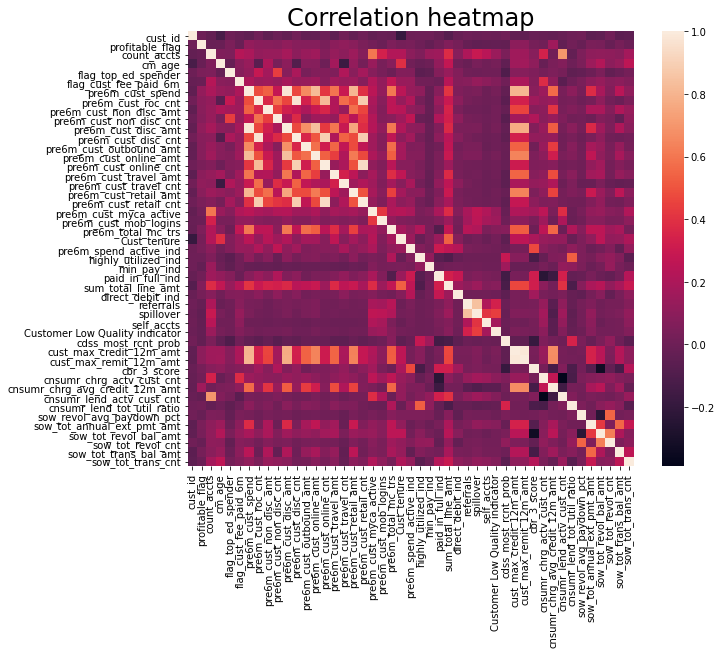

In [ ]:
# distribution plot for corr matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat.values, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns)
plt.title('Correlation heatmap', fontsize=24)
plt.show()

In [ ]:
# Doing random analysis

In [ ]:
train = train_data.copy(deep=True)

In [ ]:
train.shape[0]

19595

In [ ]:
train.isna().sum().sort_values(ascending=False)

sow_tot_revol_bal_amt             16498
cnsumr_chrg_avg_credit_12m_amt    15448
sow_tot_trans_bal_amt             14089
sow_tot_annual_ext_pmt_amt        10557
pre6m_cust_outbound_amt            2246
cust_max_remit_12m_amt             2002
pre6m_cust_travel_amt              1974
cust_max_credit_12m_amt            1853
sum_total_line_amt                 1784
pre6m_cust_online_amt              1249
pre6m_cust_non_disc_amt            1192
pre6m_cust_retail_amt               854
pre6m_cust_disc_amt                 725
pre6m_cust_spend                    615
sow_tot_trans_cnt                   245
cdss_most_rcnt_prob                 245
cbr_3_score                         245
cnsumr_chrg_actv_cust_cnt           245
cnsumr_lend_actv_cust_cnt           245
cnsumr_lend_tot_util_ratio          245
sow_revol_avg_paydown_pct           245
sow_tot_revol_cnt                   245
Cust_tenure                         236
pre6m_spend_active_ind              236
highly_utilized_ind                 236


In [ ]:
# dropping cols having heavy null values and low correlation cofficient with target variable
null_col_drop = ['sow_tot_revol_bal_amt','sow_tot_trans_bal_amt','sow_tot_annual_ext_pmt_amt']
train = train.drop(columns=null_col_drop)

In [ ]:
# dropping cols from test data
test_data = test_data.drop(columns=null_col_drop)

In [ ]:
# Imputing missing values for the rest of the columns using median
col = list(train.columns)
imputer = SimpleImputer(strategy='median')
train[col] = imputer.fit_transform(train[col])

In [ ]:
# imputation in test data
test_data['profitable_flag'] = 1
test_data[col] = imputer.transform(test_data[col])
test_data.drop(columns='profitable_flag', inplace=True)

In [ ]:
corr_mat = train.corr()

<Figure size 720x432 with 0 Axes>

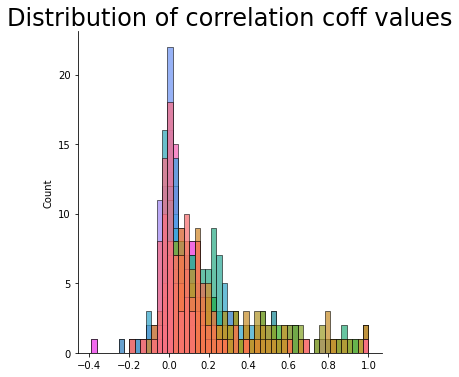

In [ ]:
# distribution plot for corr matrix after dropping out few columns
plt.figure(figsize=(10,6))
sns.displot(corr_mat.values, legend= False, kind='hist')
plt.title('Distribution of correlation coff values', fontsize=24)
plt.show()

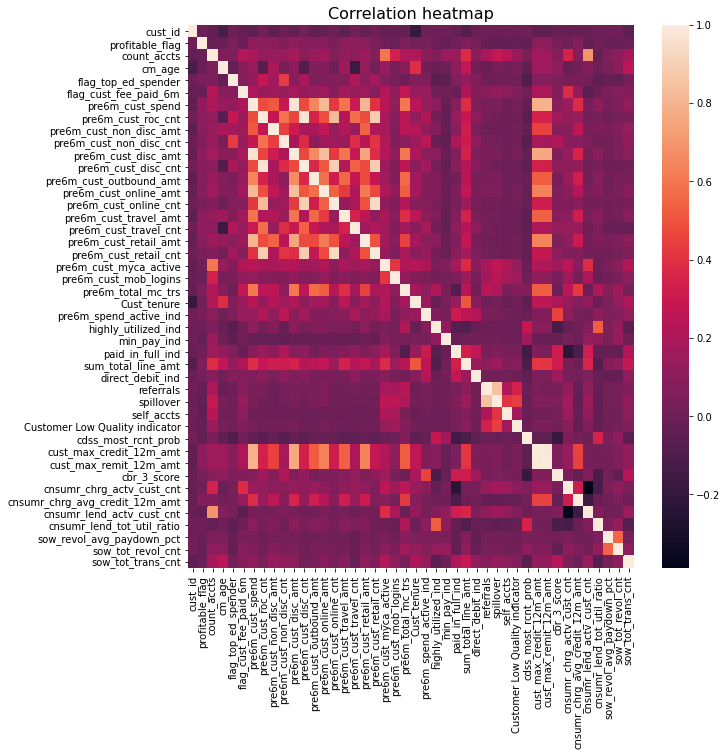

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat.values, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns)
plt.title('Correlation heatmap', fontsize=16)
plt.show()

In [ ]:
target_corr = corr_mat.iloc[1,:].sort_values()
target_corr = target_corr[:-1]

Text(0.5, 1.0, 'Correlation values with target variable')

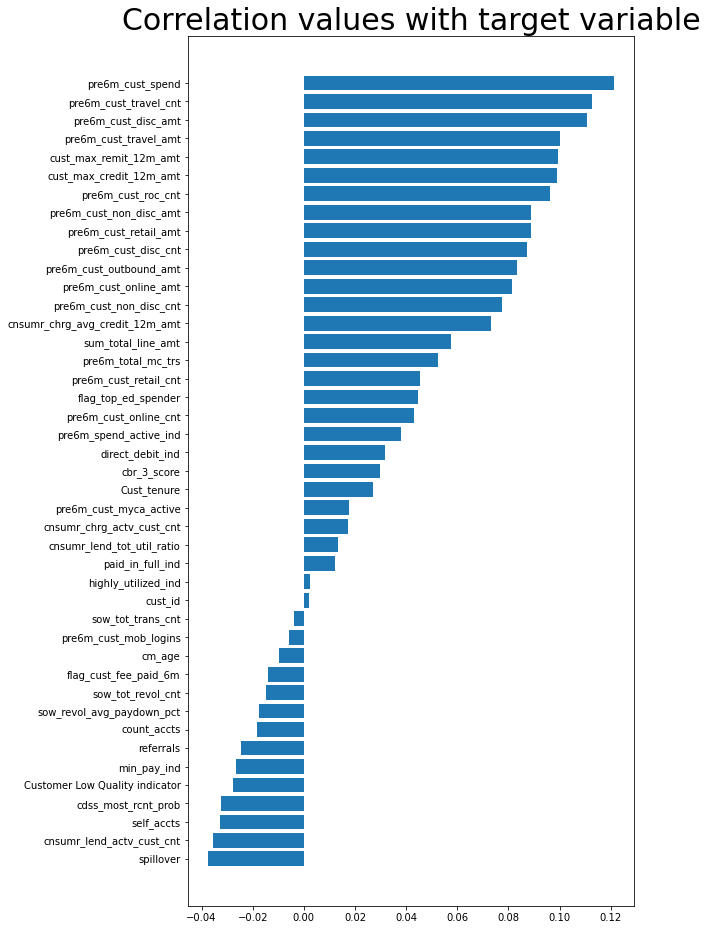

In [ ]:
plt.figure(figsize=(8,16))
plt.barh(list(target_corr.index), list(target_corr.values))
plt.title('Correlation values with target variable', fontsize=30)

In [ ]:
# Finding highly corr feature pairs
col = list(train.columns)
pairs = []
for i in range(len(col)):
  for j in range(i+1,len(col),1):
    if i == j:
      continue
    if corr_mat.iloc[i,j] > 0.5:
      pairs.append((col[i], col[j], corr_mat.iloc[i,j]))

pairs.sort(key = lambda x : x[2], reverse=True)

In [ ]:
# sorted list of pairs having high corr
pairs

[('cust_max_credit_12m_amt', 'cust_max_remit_12m_amt', 0.9861438012874116),
 ('pre6m_cust_spend', 'pre6m_cust_disc_amt', 0.9730325229649457),
 ('pre6m_cust_roc_cnt', 'pre6m_cust_disc_cnt', 0.9712875673139646),
 ('pre6m_cust_online_cnt', 'pre6m_cust_retail_cnt', 0.9390173240646688),
 ('pre6m_cust_disc_cnt', 'pre6m_cust_online_cnt', 0.8930653854209487),
 ('pre6m_cust_disc_cnt', 'pre6m_cust_retail_cnt', 0.8906160113910369),
 ('pre6m_cust_roc_cnt', 'pre6m_cust_retail_cnt', 0.8851087401594667),
 ('referrals', 'spillover', 0.8464940726172074),
 ('pre6m_cust_disc_amt', 'pre6m_cust_online_amt', 0.8397152662427706),
 ('pre6m_cust_roc_cnt', 'pre6m_cust_online_cnt', 0.8226164502350798),
 ('pre6m_cust_spend', 'pre6m_cust_online_amt', 0.8204378312604217),
 ('pre6m_cust_spend', 'pre6m_cust_retail_amt', 0.8055053205108511),
 ('pre6m_cust_spend', 'cust_max_remit_12m_amt', 0.7946861790611087),
 ('pre6m_cust_spend', 'cust_max_credit_12m_amt', 0.7895524812981357),
 ('pre6m_cust_disc_amt', 'cust_max_remit

In [ ]:
train.head()

,cust_id,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_revol_cnt,sow_tot_trans_cnt
0,550391.0,0.0,1.0,74.0,1.0,0.0,1518.0,122.0,811.0,96.0,707.0,26.0,410.0,606.0,36.0,28.0,2.0,814.0,98.0,9.0,203.0,2.0,63.0,1.0,0.0,0.0,1.0,80000.0,1.0,1.0,0.0,0.0,0.0,0.000,482.0,418.0,1376.0,0.0,395.0,1.0,0.034044,0.0000,0.0,3.0
1,550392.0,0.0,1.0,64.0,0.0,0.0,4807.0,354.0,1052.0,82.0,3756.0,272.0,673.0,3164.0,456.0,2291.0,44.0,1265.0,116.0,0.0,0.0,15.0,203.0,1.0,0.0,0.0,1.0,140000.0,1.0,1.0,1.0,0.0,0.0,0.000,2165.0,2165.0,1300.0,0.0,7.0,1.0,0.044086,0.0877,2.0,0.0
2,550393.0,0.0,1.0,75.0,1.0,0.0,2361.0,204.0,1351.0,118.0,1010.0,86.0,237.0,693.0,152.0,903.0,0.0,1623.0,166.0,9.0,18.0,20.0,201.0,1.0,0.0,0.0,1.0,32800.0,0.0,0.0,0.0,0.0,0.0,0.000,703.0,687.0,1376.0,0.0,395.0,1.0,0.039613,0.0000,0.0,3.0
3,550394.0,0.0,2.0,73.0,0.0,1.0,5452.0,142.0,1195.0,50.0,4257.0,92.0,803.0,1618.0,64.0,2760.0,54.0,1605.0,54.0,9.0,23.0,30.0,286.0,1.0,0.0,0.0,1.0,100000.0,1.0,0.0,0.0,0.0,0.0,0.000,1225.0,1225.0,1372.0,1.0,493.0,1.0,0.001200,0.0000,0.0,4.0
4,550395.0,0.0,2.0,68.0,0.0,0.0,170.0,34.0,88.0,20.0,82.0,14.0,10.0,10.0,4.0,903.0,0.0,66.0,18.0,0.0,0.0,9.0,123.0,1.0,0.0,0.0,1.0,20800.0,1.0,0.0,0.0,0.0,0.0,0.001,51.0,35.0,1338.0,0.0,395.0,2.0,0.003378,0.0168,5.0,13.0


In [ ]:
# Aggregating columns having high correlation cofficients
col_set1 = ['pre6m_cust_spend','pre6m_cust_non_disc_amt','pre6m_cust_disc_amt','pre6m_cust_outbound_amt','pre6m_cust_online_amt',
            'pre6m_cust_travel_amt','pre6m_cust_retail_amt']
col_set2 = ['pre6m_cust_roc_cnt','pre6m_cust_non_disc_cnt','pre6m_cust_disc_cnt','pre6m_cust_online_cnt','pre6m_cust_travel_cnt',
            'pre6m_cust_retail_cnt']
col_set3 = ['cust_max_credit_12m_amt','cust_max_remit_12m_amt']
col_set4 = ['referrals','spillover']
col_set5 = ['sow_tot_revol_cnt','sow_tot_trans_cnt']

In [ ]:
# (To-Do) Replace mean by the first of the column

# train['pre6m_spend'] = train[col_set1].mean(axis=1)
train['pre6m_spend'] = train['pre6m_cust_spend']
train = train.drop(columns=col_set1)

# train['pre6m_count'] = train[col_set2].mean(axis=1)
train['pre6m_count'] = train['pre6m_cust_roc_cnt']
train = train.drop(columns=col_set2)

# train['cust6m_max_amt'] = train[col_set3].mean(axis=1) / 2
train['cust6m_max_amt'] = train['cust_max_credit_12m_amt']/2
train = train.drop(columns=col_set3)

# train['reff_spill'] = train[col_set4].mean(axis=1)
train['reff_spill'] = train['spillover']
train = train.drop(columns=col_set4)

train['sow_counts'] = train[col_set5].mean(axis=1)
train = train.drop(columns=col_set5)

In [ ]:
# for test data

test_data['prem6m_spend'] = test_data['pre6m_cust_spend']
test_data = test_data.drop(columns=col_set1)

test_data['pre6m_count'] = test_data['pre6m_cust_roc_cnt']
test_data = test_data.drop(columns=col_set2)

test_data['cust6m_max_amt'] = test_data['cust_max_credit_12m_amt'] / 2
test_data = test_data.drop(columns=col_set3)

test_data['reff_spill'] = test_data['spillover']
test_data = test_data.drop(columns=col_set4)

test_data['sow_counts'] = test_data[col_set5].mean(axis=1)
test_data = test_data.drop(columns=col_set5)

In [ ]:
# Additional columns to drop which have less corr coff with target
drop_col = ['cm_age','pre6m_cust_mob_logins','sow_counts','cust_id','highly_utilized_ind','paid_in_full_ind','cnsumr_lend_tot_util_ratio',
            'cnsumr_chrg_actv_cust_cnt','pre6m_cust_myca_active']
train = train.drop(columns=drop_col)

In [ ]:
# for test data dropping cols
cust_id = test_data['cust_id']
test_data = test_data.drop(columns=drop_col)

In [ ]:
y = train['profitable_flag']
train.drop(columns='profitable_flag', inplace=True)

In [ ]:
train.columns

Index(['count_accts', 'flag_top_ed_spender', 'flag_cust_fee_paid_6m',
       'pre6m_total_mc_trs', 'Cust_tenure', 'pre6m_spend_active_ind',
       'min_pay_ind', 'sum_total_line_amt', 'direct_debit_ind', 'self_accts',
       'Customer Low Quality indicator', 'cdss_most_rcnt_prob', 'cbr_3_score',
       'cnsumr_chrg_avg_credit_12m_amt', 'cnsumr_lend_actv_cust_cnt',
       'sow_revol_avg_paydown_pct', 'pre6m_spend', 'pre6m_count',
       'cust6m_max_amt', 'reff_spill'],
      dtype='object')

# **Gradient Boosting Classifier with oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE()
#under = RandomUnderSampler(sampling_strategy=0.6)
model = GradientBoostingClassifier()
steps = [('o', over), ('model',model)]
pipe = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(pipe, train, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores.mean()

0.6347347994193349

In [ ]:
k_values = [1,2,3,4,5,6,7]
for k in k_values:
  over = SMOTE(sampling_strategy=0.3, k_neighbors=k)
  under = RandomUnderSampler(sampling_strategy=0.6)
  model = GradientBoostingClassifier(random_state=42)
  steps = [('o', over), ('u', under), ('model',model)]
  pipe = Pipeline(steps=steps)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  scores = cross_val_score(pipe, train, y, scoring='roc_auc', cv=cv, n_jobs=-1)
  print('k = {}, score is {}'.format(k,scores.mean()))

k = 1, score is 0.6501385699718717
k = 2, score is 0.6495523180191861
k = 3, score is 0.6493172689924119
k = 4, score is 0.6493891324568061
k = 5, score is 0.6488179369534905
k = 6, score is 0.6490852727577597
k = 7, score is 0.6504426928871668


In [ ]:
# Since k=4 gives best score so, getting predictions for test data
over = SMOTE(sampling_strategy=0.3, k_neighbors=4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u',under)]
pipe = Pipeline(steps=steps)

In [ ]:
sample_x, sample_y = pipe.fit_resample(train, y)

counter = Counter(sample_y)
print(counter)

Counter({0.0: 7975, 1.0: 4785})


In [ ]:
xgb = GradientBoostingClassifier()
xgb.fit(sample_x, sample_y)
predx = xgb.predict(sample_x)

In [ ]:
roc_auc_score(sample_y, predx)

0.6620480668756531

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(sample_y, predx))
print("Precision Score:", precision_score(sample_y, predx))
print("Recall score:", recall_score(sample_y, predx))
print(classification_report(sample_y, predx))

Confusion Matrix:
 [[7443  532]
 [2915 1870]]
Precision Score: 0.7785179017485429
Recall score: 0.39080459770114945
              precision    recall  f1-score   support

         0.0       0.72      0.93      0.81      7975
         1.0       0.78      0.39      0.52      4785

    accuracy                           0.73     12760
   macro avg       0.75      0.66      0.67     12760
weighted avg       0.74      0.73      0.70     12760



No Skill: ROC AUC=0.500
Gradient Boosting: ROC AUC=0.764


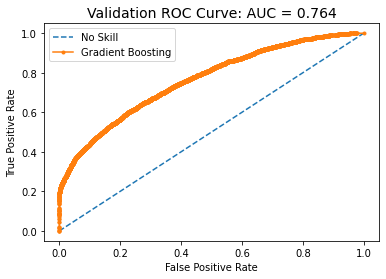

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(sample_y))]
# predict probabilities
lr_probs = xgb.predict_proba(sample_x)
# keep probabilities for the positive outcome only
lr_probs2 = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(sample_y, ns_probs)
lr_auc = roc_auc_score(sample_y, lr_probs2)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(sample_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(sample_y, lr_probs2)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Gradient Boosting')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curve: AUC = 0.764', fontsize = 14)
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
predictions = xgb.predict(test_data)

In [ ]:
submission = pd.DataFrame(list(zip(list(cust_id),list(predictions))), columns=['cust_id', 'profitable_flag'], dtype='int64')

In [ ]:
submission.head()

,cust_id,profitable_flag
0,569986,1
1,569987,0
2,569988,0
3,569989,1
4,569990,0


In [ ]:
#saving as xgb output
submission.to_csv('submission_xgb.csv')

from google.colab import files
files.download('submission_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Random Forest Classifier with oversampling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

For training: Counter({0.0: 7656, 1.0: 3828})
Confusion Matrix:
 [[2990  200]
 [ 618  111]]
Precision Score: 0.35691318327974275
Recall score: 0.1522633744855967
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      3190
         1.0       0.36      0.15      0.21       729

    accuracy                           0.79      3919
   macro avg       0.59      0.54      0.55      3919
weighted avg       0.74      0.79      0.76      3919



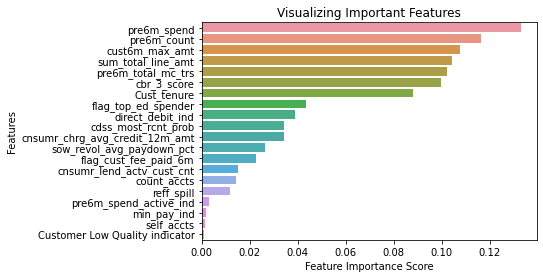

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.626


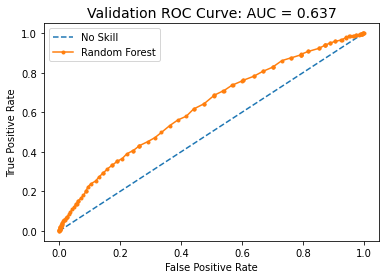

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train, y, test_size=0.2, stratify=y, random_state=42)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Oversampling
over = SMOTE(sampling_strategy=0.3, k_neighbors=4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u',under)]
pipe = Pipeline(steps=steps)

x_train_sampled, y_train_sampled = pipe.fit_resample(x_train, y_train)

counter = Counter(y_train_sampled)
print('For training:', counter)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train_sampled,y_train_sampled)

y_pred = clf.predict(x_val)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Precision Score:", precision_score(y_val, y_pred))
print("Recall score:", recall_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Visualizing important features
feature_imp = pd.Series(clf.feature_importances_, index = train.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# ROC plot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]
# predict probabilities
lr_probs = clf.predict_proba(x_val)
# keep probabilities for the positive outcome only
lr_probs2 = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs2)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs2)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curve: AUC = 0.637', fontsize = 14)
# show the legend
plt.legend()
# show the plot
plt.show()

#**Neural Network Classifier with oversampling**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout
from keras import backend as K
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train, y, test_size=0.2, stratify=y, random_state=42)
# x_train.head(5)
# y_train.head(5)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)

x_train shape: (15676, 20)
y_train shape: (15676,)
x_val shape: (3919, 20)
y_val shape: (3919,)


In [ ]:
over = SMOTE(sampling_strategy=0.3, k_neighbors=4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u',under)]
pipe = Pipeline(steps=steps)

x_train_sampled, y_train_sampled = pipe.fit_resample(x_train, y_train)

counter = Counter(y_train_sampled)
print('For training:', counter)

For training: Counter({0.0: 7656, 1.0: 3828})


In [ ]:
over = SMOTE(sampling_strategy=0.3, k_neighbors=4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u',under)]
pipe = Pipeline(steps=steps)

# x_val_sampled, y_val_sampled = pipe.fit_resample(x_val, y_val)
x_val_sampled, y_val_sampled = np.array(x_val.values), np.array(y_val.values)

counter = Counter(y_val_sampled)
print('For validation:', counter)

For validation: Counter({0.0: 3190, 1.0: 729})


In [ ]:
N = y_train.shape[0]
pos_freq = np.sum(y_train.values, axis=0) / N
neg_freq = 1 - pos_freq
pos_weights = neg_freq
neg_weights = pos_freq

In [ ]:
scaler = StandardScaler()
scaler.fit(train)
x_train_scaled = scaler.transform(x_train_sampled)
x_val_scaled = scaler.transform(x_val_sampled)

# y_train_array = np.array(y_train.values)
y_train_tensor = K.constant(y_train_sampled)

# y_val_array = np.array(y_val.values)
y_val_tensor = K.constant(y_val_sampled)

In [ ]:
def get_weighted_loss(pos_weights, neg_weights, epsilon = 1e-7):
  
  
  def weighted_loss(y_true, y_pred):
        loss = 0.0
        loss_pos = - K.mean(pos_weights * y_true * K.log(y_pred + epsilon))
        loss_neg = - K.mean(neg_weights * (1 - y_true) * K.log(1 - y_pred + epsilon))
        loss += loss_pos + loss_neg
        
        return loss


  return weighted_loss

In [ ]:
def get_model():
  model = Sequential()
  model.add(Dense(20, input_dim=20, activation='tanh', kernel_initializer='he_uniform'))
  model.add(Dense(32, activation='tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(loss='binary_crossentropy', 
                optimizer = opt, 
                metrics = [tf.keras.metrics.AUC()]
                )
  # model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, neg_weights), metrics=[tf.keras.metrics.AUC()])

  return model

Epoch 1/40
359/359 [==============================] - 1s 3ms/step - loss: 0.6305 - auc: 0.5962 - val_loss: 0.5089 - val_auc: 0.6422
Epoch 2/40
359/359 [==============================] - 1s 1ms/step - loss: 0.6123 - auc: 0.6329 - val_loss: 0.4986 - val_auc: 0.6436
Epoch 3/40
359/359 [==============================] - 1s 1ms/step - loss: 0.6109 - auc: 0.6378 - val_loss: 0.5140 - val_auc: 0.6524
Epoch 4/40
359/359 [==============================] - 1s 2ms/step - loss: 0.6081 - auc: 0.6439 - val_loss: 0.5175 - val_auc: 0.6530
Epoch 5/40
359/359 [==============================] - 1s 2ms/step - loss: 0.6075 - auc: 0.6444 - val_loss: 0.4914 - val_auc: 0.6501
Epoch 6/40
359/359 [==============================] - 1s 2ms/step - loss: 0.6062 - auc: 0.6469 - val_loss: 0.5097 - val_auc: 0.6565
Epoch 7/40
359/359 [==============================] - 1s 2ms/step - loss: 0.6035 - auc: 0.6540 - val_loss: 0.5138 - val_auc: 0.6576
Epoch 8/40
359/359 [==============================] - 1s 1ms/step - loss: 0.

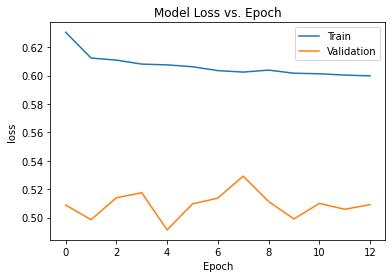

In [ ]:
model = get_model()
early_stopping = EarlyStopping(monitor='val_loss', 
                               mode='min', 
                               verbose = 1, # Shows progress of each epoch
                               patience = 8, # Check for 8 more iterations after loss decrement stalls
                               restore_best_weights = False
                               )

loss_history = model.fit(x_train_scaled, 
                         y_train_tensor, epochs=40, 
                         verbose=1, 
                         validation_data=(x_val_scaled, y_val_sampled), 
                         callbacks= [early_stopping]
                         )

model.summary() # Get model summary

# early_stopping.stopped_epoch returns 0 if training didn't stop early.
if early_stopping.stopped_epoch != 0:
  print('Training stopped after',early_stopping.stopped_epoch,'epochs.')

plt.plot(loss_history.history['loss'])
plt.plot(loss_history.history['val_loss'])
plt.title('Model Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Confusion Matrix:
 [[3011  179]
 [ 629  100]]
Precision Score: 0.35842293906810035
Recall Score: 0.13717421124828533
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      3190
         1.0       0.36      0.14      0.20       729

    accuracy                           0.79      3919
   macro avg       0.59      0.54      0.54      3919
weighted avg       0.74      0.79      0.75      3919

No Skill: ROC AUC=0.500
ANN: ROC AUC=0.657


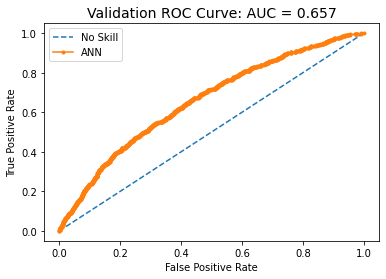

In [ ]:
y_pred_val = model.predict(x_val_scaled)
y_pred_val = np.where(y_pred_val > 0.5, 1, 0).flatten()
print("Confusion Matrix:\n",confusion_matrix(y_val_tensor, y_pred_val))
print("Precision Score:", precision_score(y_val_tensor, y_pred_val))
print("Recall Score:", recall_score(y_val_tensor, y_pred_val))
print(classification_report(y_val_tensor, y_pred_val))

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val_tensor))]
# predict probabilities
lr_probs = model.predict_proba(x_val_scaled)
# keep probabilities for the positive outcome only
lr_probs2 = lr_probs[:]
# calculate scores
ns_auc = roc_auc_score(y_val_tensor, ns_probs)
lr_auc = roc_auc_score(y_val_tensor, lr_probs2)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('ANN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val_tensor, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val_tensor, lr_probs2)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curve: AUC = 0.657', fontsize = 14)
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# predicting for test using ANN
test_scaled = scaler.transform(test_data)

In [ ]:
predictions = model.predict(test_scaled)

In [ ]:
predictions = np.where(predictions > 0.5, 1, 0).flatten()
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission = pd.DataFrame(list(zip(list(cust_id),list(predictions))), columns=['cust_id', 'profitable_flag'], dtype='int64')

In [ ]:
submission.head()

,cust_id,profitable_flag
0,569986,1
1,569987,0
2,569988,0
3,569989,1
4,569990,0


In [ ]:
# save predictions of ANN
submission.to_csv('submission_ANN.csv')